In [3118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3119]:
dataset_x_y_train = pd.read_csv("train.csv")
dataset_x_test = pd.read_csv("test.csv")
dataset_y_test = pd.read_csv("gender_submission.csv")

In [3120]:
dataset_x_y_test = dataset_y_test.merge(dataset_x_test, on='PassengerId')

In [3121]:
dataset = pd.concat([dataset_x_y_test, dataset_x_y_train])

In [3122]:
dataset = dataset.sort_values(['PassengerId'])

In [3123]:
print('\nNull Values in data \n{}'.format(dataset.isnull().sum()))
print('\nDuplicated values in data {}'.format(dataset.duplicated().sum()))


Null Values in data 
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Duplicated values in data 0


In [3124]:
print('Embarkation per ports \n{}'.format(dataset['Embarked'].value_counts()))

Embarkation per ports 
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


In [3125]:
dataset['Embarked'].fillna(value='S', inplace=True)
dataset['Fare'].fillna(value=dataset.Fare.mean(), inplace=True)

In [3126]:
mean_age_miss = dataset[dataset["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_age_mrs = dataset[dataset["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_age_mr = dataset[dataset["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_age_master = dataset[dataset["Name"].str.contains('Master.', na=False)]['Age'].mean().round()

print('Mean age of Miss. title {}'.format(mean_age_miss))
print('Mean age of Mrs. title {}'.format(mean_age_mrs))
print('Mean age of Mr. title {}'.format(mean_age_mr))
print('Mean age of Master. title {}'.format(mean_age_master))

Mean age of Miss. title 22.0
Mean age of Mrs. title 37.0
Mean age of Mr. title 33.0
Mean age of Master. title 5.0


In [3127]:
def fill_age(name_age):
    
    name = name_age[0]
    age = name_age[1]
    
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age

In [3128]:
dataset['Age'] = dataset[['Name', 'Age']].apply(fill_age,axis=1)

In [3129]:
dataset['Cabin'] = pd.Series(['X' if pd.isnull(ii) else ii[0] for ii in dataset['Cabin']])

In [3130]:
print('Mean Fare of Cabin B {}'.format(round(train[train['Cabin']=='B']['Fare'].mean(), 2)))
print('Mean Fare of Cabin C {}'.format(round(train[train['Cabin']=='C']['Fare'].mean(), 2)))
print('Mean Fare of Cabin D {}'.format(round(train[train['Cabin']=='D']['Fare'].mean(), 2)))
print('Mean Fare of Cabin E {}'.format(round(train[train['Cabin']=='E']['Fare'].mean(), 2)))
print('Mean Fare of Cabin A {}'.format(round(train[train['Cabin']=='A']['Fare'].mean(), 2)))
print('Mean Fare of Cabin T {}'.format(round(train[train['Cabin']=='T']['Fare'].mean(), 2)))
print('Mean Fare of Cabin X {}'.format(round(train[train['Cabin']=='X']['Fare'].mean(), 2)))
print('Mean Fare of Cabin F {}'.format(round(train[train['Cabin']=='F']['Fare'].mean(), 2)))
print('Mean Fare of Cabin G {}'.format(round(train[train['Cabin']=='G']['Fare'].mean(), 2)))

Mean Fare of Cabin B nan
Mean Fare of Cabin C nan
Mean Fare of Cabin D nan
Mean Fare of Cabin E nan
Mean Fare of Cabin A nan
Mean Fare of Cabin T nan
Mean Fare of Cabin X nan
Mean Fare of Cabin F nan
Mean Fare of Cabin G nan


In [3131]:
def reasign_cabin(cabin_fare):
    
    cabin = cabin_fare[0]
    fare = cabin_fare[1]
    
    if cabin=='X':
        if (fare >= 113.5):
            return 'B'
        if ((fare < 113.5) and (fare > 100)):
            return 'C'
        if ((fare < 100) and (fare > 57)):
            return 'D'
        if ((fare < 57) and (fare > 46)):
            return 'E'
        if ((fare < 46) and (fare > 39)):
            return 'A'            
        else:
            return 'X'
    else:
        return cabin

In [3132]:
dataset['Cabin'] = dataset[['Cabin', 'Fare']].apply(reasign_cabin, axis=1)

In [3133]:
print('\nNull Values in data \n{}'.format(dataset.isnull().sum()))
print('\nDuplicated values in data {}'.format(dataset.duplicated().sum()))


Null Values in data 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Duplicated values in data 0


In [3134]:
def create_alone_feature(SibSp_Parch):
    if (SibSp_Parch[0]+SibSp_Parch[1])==0:
        return 1
    else:
        return 0

dataset['Alone'] = dataset[['SibSp','Parch']].apply(create_alone_feature, axis=1)
dataset['Familiars'] = dataset['SibSp'] + dataset['Parch']

In [3135]:
categories = {"female": 1, "male": 0}
dataset['Sex']= dataset['Sex'].map(categories)

categories = {"S": 1, "C": 2, "Q": 3}
dataset['Embarked']= dataset['Embarked'].map(categories)

categories = {"X" : 0, "C" : 1, "E" : 2, "G" : 3, "D" : 4, "A" : 5, "B" : 6, "F" : 7, "T" : 8}
dataset['Cabin']= dataset['Cabin'].map(categories)

# dataset['Ticket'] = dataset['Ticket'].astype('category')
# dataset['Ticket'] = dataset['Ticket'].cat.codes

dataset = dataset.drop(['Name','PassengerId', 'Ticket'], axis=1)

In [3136]:
limit = 891
train = dataset[:limit]
test = dataset[limit:]

In [3137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

x_train = train.loc[:,['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Alone', 'Familiars']]
y_train = train.loc[:, 'Survived']

x_test = test.loc[:,['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Alone', 'Familiars']]
y_test = test.loc[:, 'Survived']

#X_train, X_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100, max_features=5, random_state=438, class_weight='balanced_subsample', criterion='entropy', max_depth=4)

In [3138]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
print(classification_report(y_test,y_pred))

   Accuracy: 0.9641148325358851
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       266
           1       0.93      0.97      0.95       152

    accuracy                           0.96       418
   macro avg       0.96      0.97      0.96       418
weighted avg       0.97      0.96      0.96       418



In [3139]:
# for i in range(0, 100000):
#     clf = RandomForestClassifier(n_estimators=101, max_features=5, random_state=i, class_weight='balanced_subsample', criterion='entropy', max_depth=7)    
#     clf.fit(x_train, y_train)
#     y_pred = clf.predict(x_test)
#     if metrics.accuracy_score(y_test, y_pred) > 0.96:
#         print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))    
#         print(i)

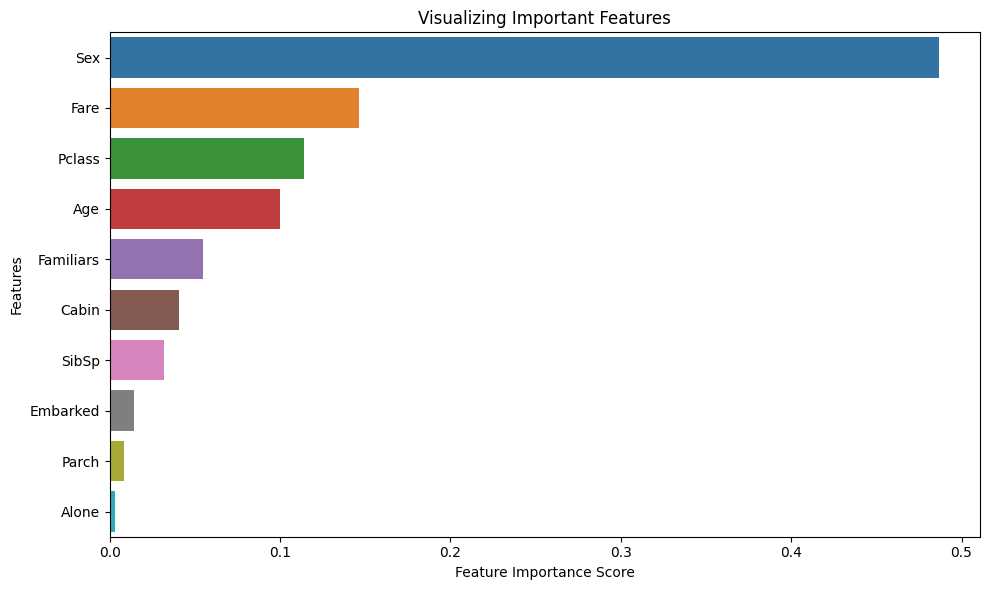

In [3140]:
feature_imp = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

In [3141]:
# x_train = x_train.drop(['Alone','Parch','Embarked'], axis=1)
# x_test = x_test.drop(['Alone','Parch','Embarked'], axis=1)

# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)

# print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
# print(classification_report(y_test,y_pred))

In [3142]:
# x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)
# print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
# print(classification_report(y_test,y_pred))

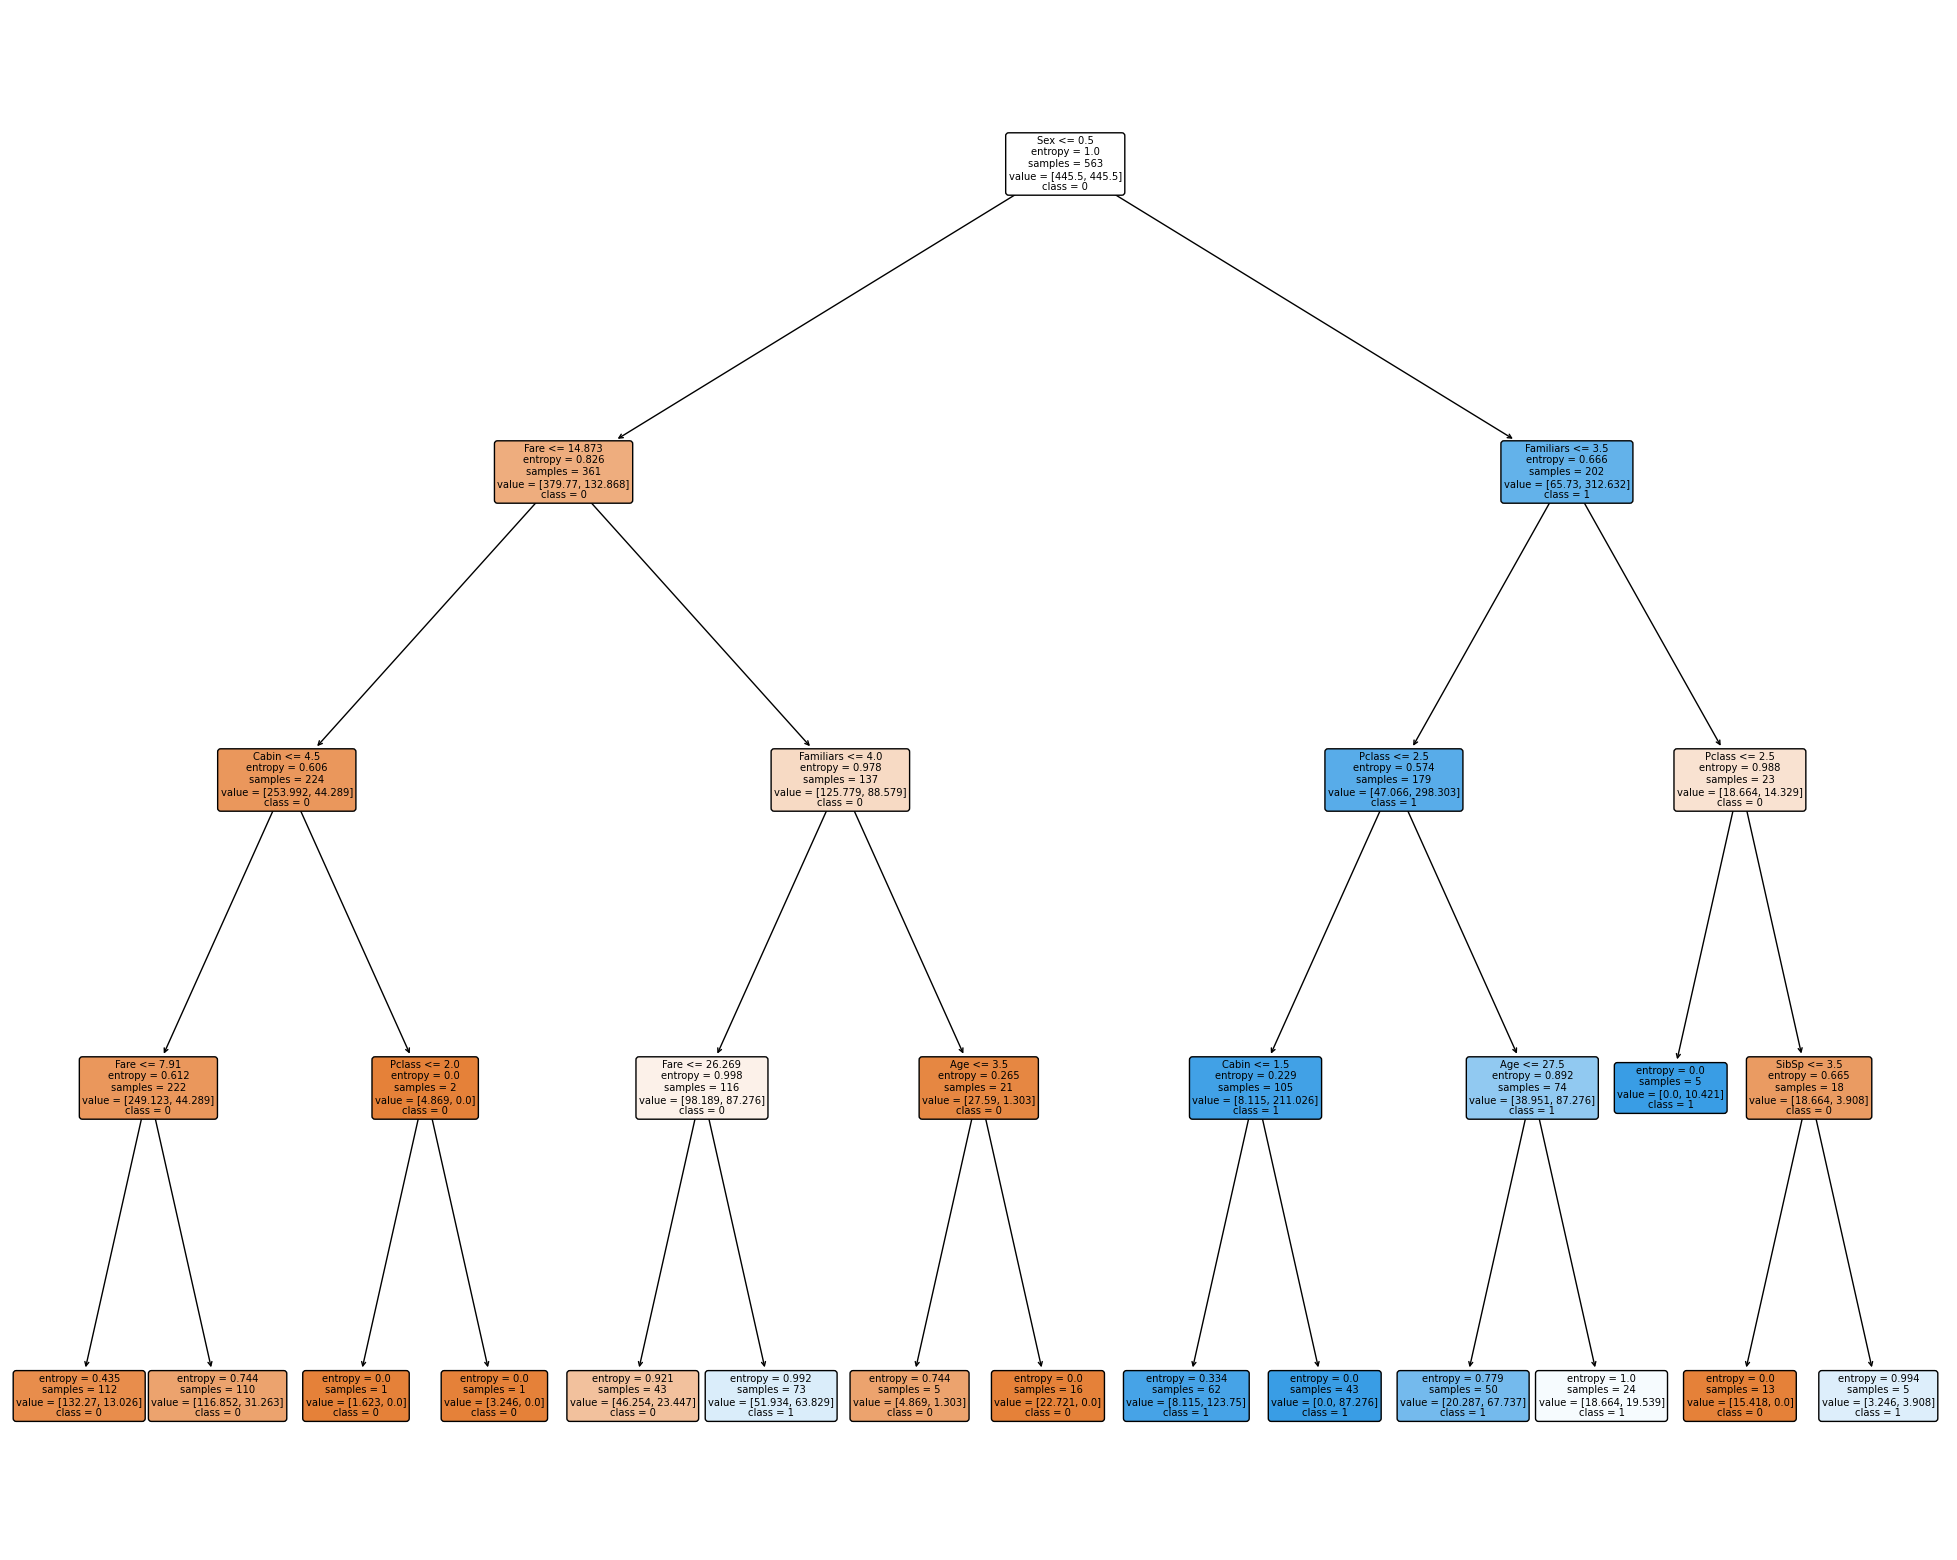

In [3143]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf.estimators_[4], 
                   feature_names=list(x_train.columns),  
                   class_names=["0", "1"],
                   filled=True, rounded = True, proportion = False)